# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [258]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [259]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [260]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [261]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [262]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [263]:
df_data.shape


(4324, 9)

In [264]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [265]:

df_data.isna() 
clean_df = df_data.dropna()


In [266]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [267]:
df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)


In [268]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

<Axes: xlabel='Organisation'>

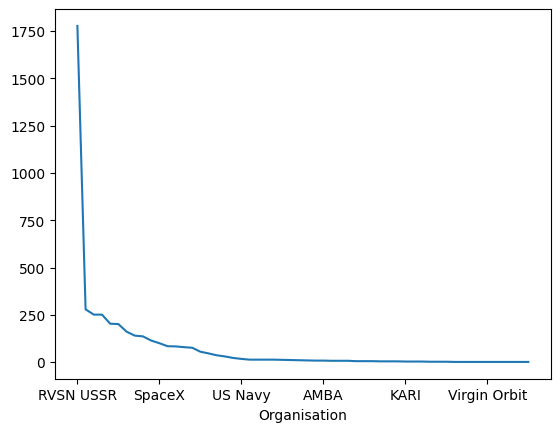

In [269]:
df_data['Organisation'].value_counts().plot()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [270]:
df_data['Rocket_Status'].value_counts()

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [271]:
df_data['Mission_Status'].value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [272]:
df_data[df_data["Price"].notna()]["Price"].str.replace(',', '').astype(float)

0       50.00
1       29.75
3       65.00
4      145.00
5       64.68
        ...  
3855    59.00
3971    63.23
3993    63.23
4000    63.23
4020    63.23
Name: Price, Length: 964, dtype: float64

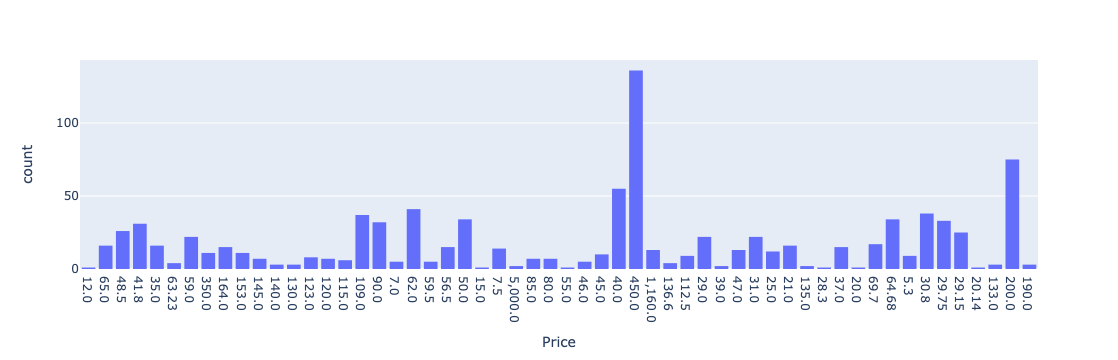

In [273]:
px.histogram(df_data.sort_values(by=["Organisation", "Price"], ascending=[False, False]), x="Price",nbins=10) 

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

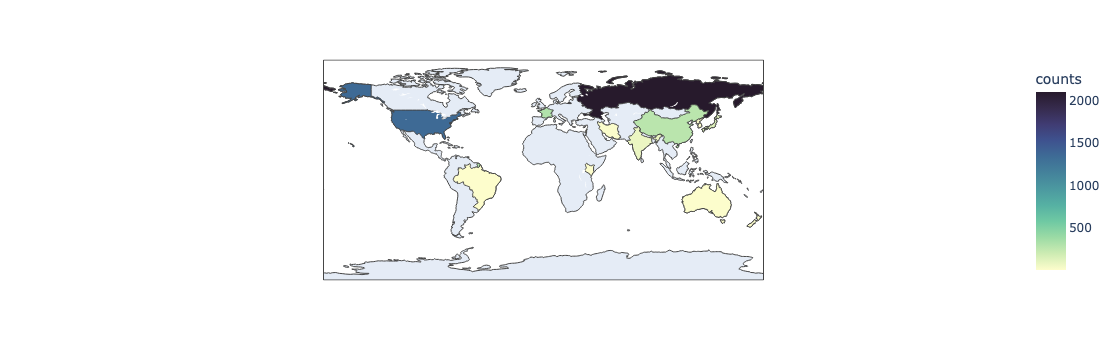

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,RUS
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [274]:
import iso3166
df_data["Country"] = df_data["Location"].str.split(", ").str[-1]

df_data.loc[(df_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Yellow Sea'), "Country"] = "China"
df_data.loc[(df_data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
df_data.loc[(df_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'Gran Canaria'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Iran'), "Country"] = "Iran, Islamic Republic of"
df_data.loc[(df_data["Country"] == 'South Korea'), "Country"] = "Korea, Republic of"
df_data.loc[(df_data["Country"] == 'North Korea'), "Country"] = "Korea, Democratic People's Republic of"
df_data.loc[(df_data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"

countries = {country.name: key for key, country in iso3166.countries_by_alpha3.items()}
df_data = df_data.replace({"Country": countries})

launches = df_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

world_map = px.choropleth(launches, locations="Country", color="counts", color_continuous_scale=px.colors.sequential.deep)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()
df_data.head()

# Use a Choropleth Map to Show the Number of Failures by Country


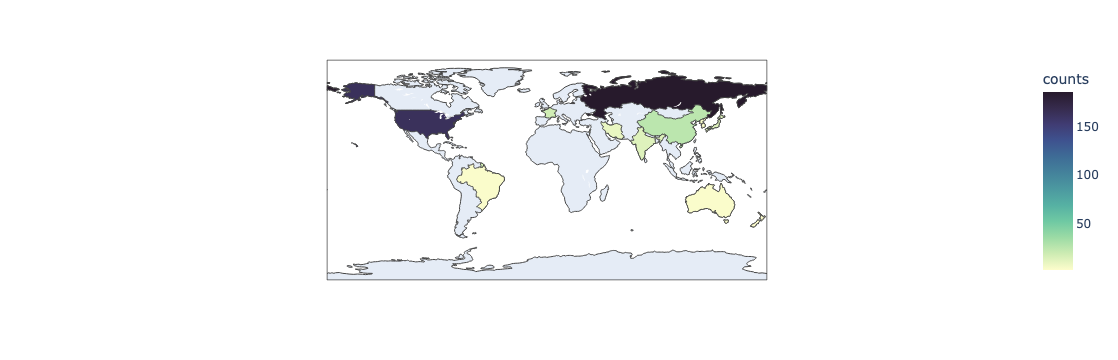

In [275]:
statuses = df_data.groupby("Country")["Mission_Status"].value_counts().rename_axis(["Country", "Status"]).reset_index(name='counts')
failures = statuses[statuses["Status"].str.contains("Fail")].groupby("Country").sum()

world_map = px.choropleth(failures, locations=failures.index, color="counts", color_continuous_scale=px.colors.sequential.deep)
world_map.update_layout(coloraxis_showscale=True) 
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

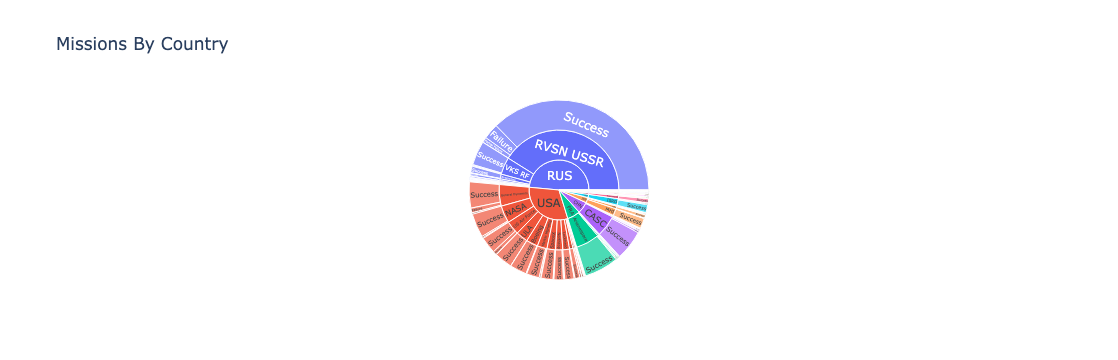

In [276]:
sunburst = df_data.groupby(by=["Country", "Organisation", "Mission_Status"], as_index=False).size()
sunburst = sunburst.sort_values("size", ascending=False)
sunburst.head()
px.sunburst(sunburst, path=["Country", "Organisation", "Mission_Status"], values="size", title="Missions By Country")

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [277]:
money_spent = df_data[df_data["Price"].notna()]

money_spent["Price"] = money_spent["Price"].str.replace(',', '').astype(float)

total_money_spent = money_spent.groupby("Organisation")["Price"].sum().reset_index()
total_money_spent.sort_values(by="Price", ascending=False)
total_money_spent.head()

,Organisation,Price
0,Arianespace,"16,345.00"
1,Boeing,"1,241.00"
2,CASC,"6,340.26"
3,EER,20.00
4,ESA,37.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [278]:

organisation_expense = money_spent.groupby("Organisation")["Price"].mean().reset_index()
organisation_expense.sort_values("Price", ascending=False)
organisation_expense.head()

,Organisation,Price
0,Arianespace,170.26
1,Boeing,177.29
2,CASC,40.13
3,EER,20.00
4,ESA,37.00


# Chart the Number of Launches per Year

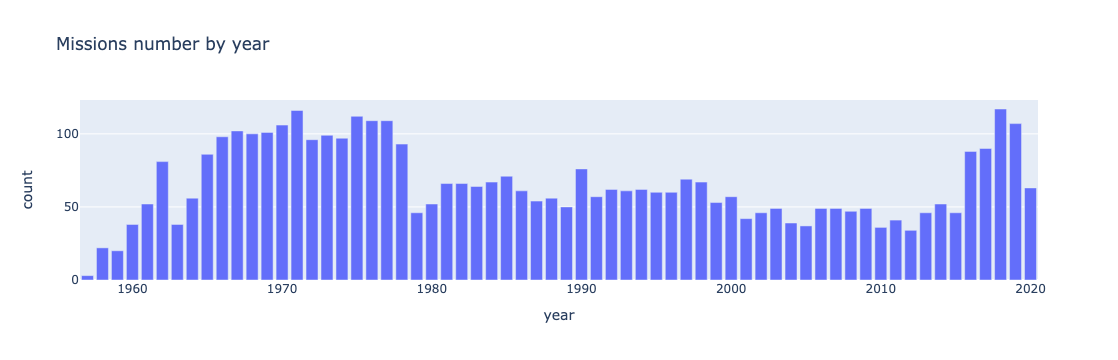

In [279]:


df_data['date'] = pd.to_datetime(df_data['Date'], errors='coerce')
df_data['year'] = df_data['date'].apply(lambda datetime: datetime.year)

ds = df_data['year'].value_counts().reset_index()
ds.columns = [
    'year', 
    'count'
]
fig = px.bar(
    ds, 
    x='year', 
    y="count", 
    orientation='v', 
    title='Missions number by year' 
)
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

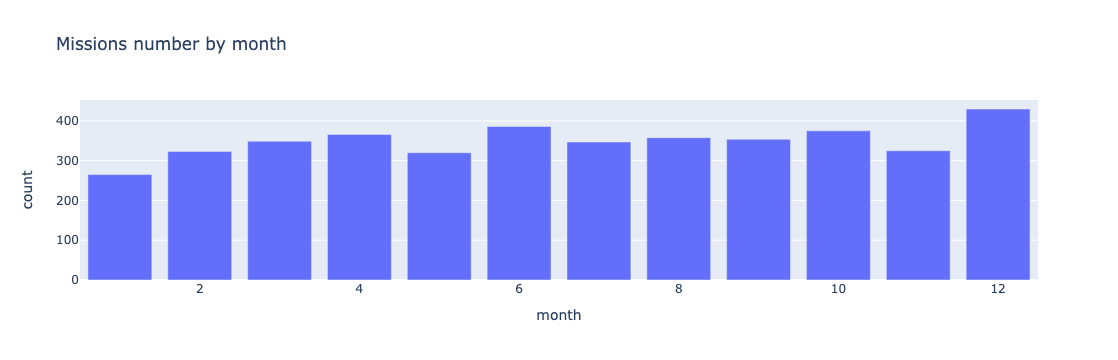

In [280]:
df_data['date'] = pd.to_datetime(df_data['Date'], errors='coerce')
df_data['month'] = df_data['date'].apply(lambda datetime: datetime.month)

ds = df_data['month'].value_counts().reset_index()
ds.columns = [
    'month', 
    'count'
]
fig = px.bar(
    ds, 
    x='month', 
    y="count", 
    orientation='v', 
    title='Missions number by month' 
)
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [281]:
most_launches = ds['count'].max()
print("Most launches in a month =", most_launches)

ds.sort_values(by="count", ascending=False)
ds.max()

Most launches in a month = 430


month    12.00
count   430.00
dtype: float64

In [282]:
least_launches = ds['count'].min()
print("Least launches in a month =", least_launches)
ds.min()

Least launches in a month = 265


month     1.00
count   265.00
dtype: float64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

<Axes: xlabel='year'>

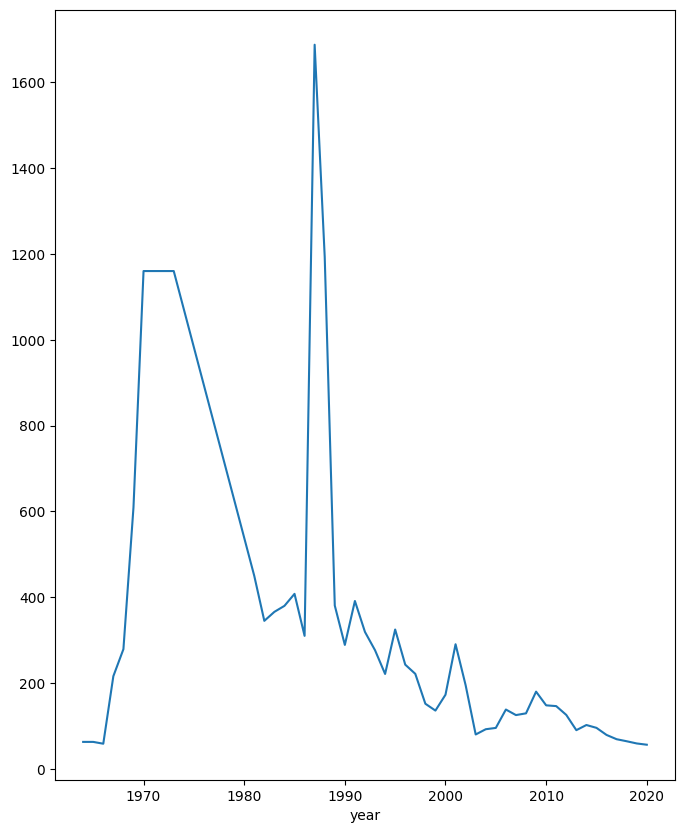

In [299]:

price = df_data[df_data['Price'].notna()]
price['Price'] = price['Price'].str.replace(',', '').astype(float)
avg_price.groupby('year').agg('Price').mean().plot(figsize=(8,10))




# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

/var/folders/2b/d49gl1791pz5p5477nf69dv40000gn/T/ipykernel_20504/1475022538.py:4: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



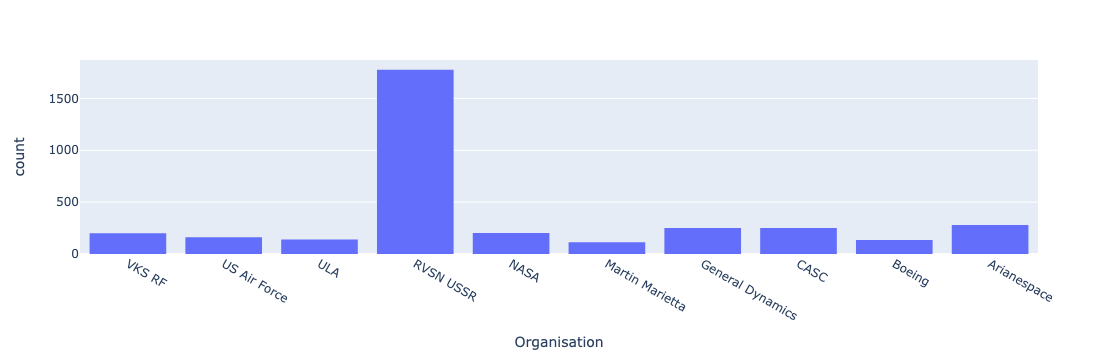

In [348]:
top_10=pd.DataFrame(columns=df_data.columns)
for val in df_data.groupby("Organisation").count().sort_values("Date",ascending=False)[:10].index:
  org=df_data[df_data.Organisation==val]
  top_10=top_10._append(org,ignore_index=False, sort=False)

top_10.groupby("Organisation").count().sort_values("Date",ascending=False)[:10].index
px.histogram(top_10.sort_values(by=["Organisation", "Date"], ascending=[False, False]), x="Organisation",nbins=1)

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [302]:
co_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]

In [303]:
cold_war_years = co_df.sort_values("year")

cold_war_years[(cold_war_years.year <= 1991)]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,year,month
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957-12-06 16:44:00+00:00,"1,957.00",12.00
4294,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA","Sat Dec 06, 1958 05:44 UTC",Juno II | Pioneer 3,StatusRetired,NaN,Partial Failure,USA,1958-12-06 05:44:00+00:00,"1,958.00",12.00
4295,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Thu Dec 04, 1958 18:18 UTC",Vostok | E-1 n†­3 (Luna-1),StatusRetired,NaN,Failure,RUS,1958-12-04 18:18:00+00:00,"1,958.00",12.00
4296,NASA,"SLC-17A, Cape Canaveral AFS, Florida, USA","Sat Nov 08, 1958 07:30 UTC",Thor-DM 18 Able I | Pioneer 2,StatusRetired,NaN,Failure,USA,1958-11-08 07:30:00+00:00,"1,958.00",11.00
4297,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA","Thu Oct 23, 1958 03:21 UTC",Juno I | Beacon 1,StatusRetired,NaN,Failure,USA,1958-10-23 03:21:00+00:00,"1,958.00",10.00
...,...,...,...,...,...,...,...,...,...,...,...
1717,CASC,"LC-3, Xichang Satellite Launch Center, China","Sat Dec 28, 1991 12:00 UTC",Long March 3 | DFH-2A-T5,StatusRetired,NaN,Partial Failure,CHN,1991-12-28 12:00:00+00:00,"1,991.00",12.00
1733,RVSN USSR,"Site 45/1, Baikonur Cosmodrome, Kazakhstan","Fri Aug 30, 1991 08:58 UTC",Zenit-2 | Tselina-2 n†­9,StatusRetired,NaN,Failure,RUS,1991-08-30 08:58:00+00:00,"1,991.00",8.00
1746,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia","Tue Jun 25, 1991 13:20 UTC",Cosmos-3M (11K65M) | Ta??foun n†­59,StatusRetired,NaN,Failure,RUS,1991-06-25 13:20:00+00:00,"1,991.00",6.00
1757,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Thu Apr 18, 1991 23:30 UTC",Atlas I | Yuri 3H,StatusRetired,NaN,Failure,USA,1991-04-18 23:30:00+00:00,"1,991.00",4.00


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [304]:
co_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,year,month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020-08-07 05:12:00+00:00,"2,020.00",8.00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020-08-04 23:57:00+00:00,"2,020.00",8.00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,RUS,2020-07-30 21:25:00+00:00,"2,020.00",7.00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020-07-30 11:50:00+00:00,"2,020.00",7.00
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,RUS,2020-07-23 14:26:00+00:00,"2,020.00",7.00


In [305]:
launches = co_df["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

,Country,counts
0,RUS,2099
1,USA,1351


([<matplotlib.patches.Wedge at 0x139adb1d0>,
 [Text(-0.36742349695818666, 1.0368220550716587, 'RUS'),
  Text(0.3674233998838983, -1.0368220894723246, 'USA')])

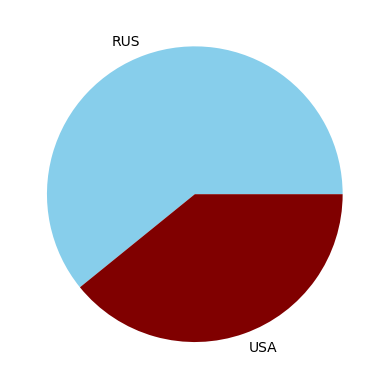

In [307]:
colors = ["skyblue", "maroon"]
grouping = co_df.groupby("Country").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['Country']

plt.pie(sizes, labels = labels, colors = colors)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

<Axes: xlabel='year'>

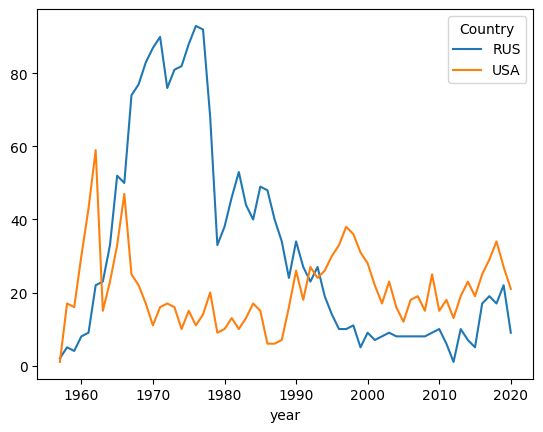

In [308]:
co_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]
co_df.groupby(["year", "Country"]).size().unstack().plot()

## Chart the Total Number of Mission Failures Year on Year.

In [385]:
co_df = df_data[df_data['Mission_Status'].str.contains("Failure")]
print(co_df.head())
co_df = co_df.replace(np.NaN, pd.NA).where(co_df.notnull())
x = pd.arange(co_df) 
y = x * x
 
# plotting
plt.title("Line graph") 
plt.xlabel("X axis") 
plt.ylabel("Y axis") 
plt.plot(x, y, color ="red") 
plt.show()
# plt.plot(co_df)
# fig = px.sunburst(co_df, path=(["co_df"],['year']))
# fig.show()

    Organisation                                           Location  \
11        ExPace    Site 95, Jiuquan Satellite Launch Center, China   
15    Rocket Lab    Rocket Lab LC-1A, M?hia Peninsula, New Zealand   
27  Virgin Orbit  Cosmic Girl, Mojave Air and Space Port, Califo...   
36          CASC       LC-2, Xichang Satellite Launch Center, China   
43          CASC    LC-201, Wenchang Satellite Launch Center, China   

                          Date                                       Detail  \
11  Fri Jul 10, 2020 04:17 UTC   Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2   
15  Sat Jul 04, 2020 21:19 UTC  Electron/Curie | Pics Or It Didn??¦t Happen   
27  Mon May 25, 2020 19:50 UTC                    LauncherOne | Demo Flight   
36  Thu Apr 09, 2020 11:46 UTC              Long March 3B/E | Nusantara Dua   
43  Mon Mar 16, 2020 13:34 UTC                        Long March 7A | XJY-6   

   Rocket_Status  Price Mission_Status Country                      date  \
11  StatusActive   28.

AttributeError: module 'pandas' has no attribute 'arange'

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

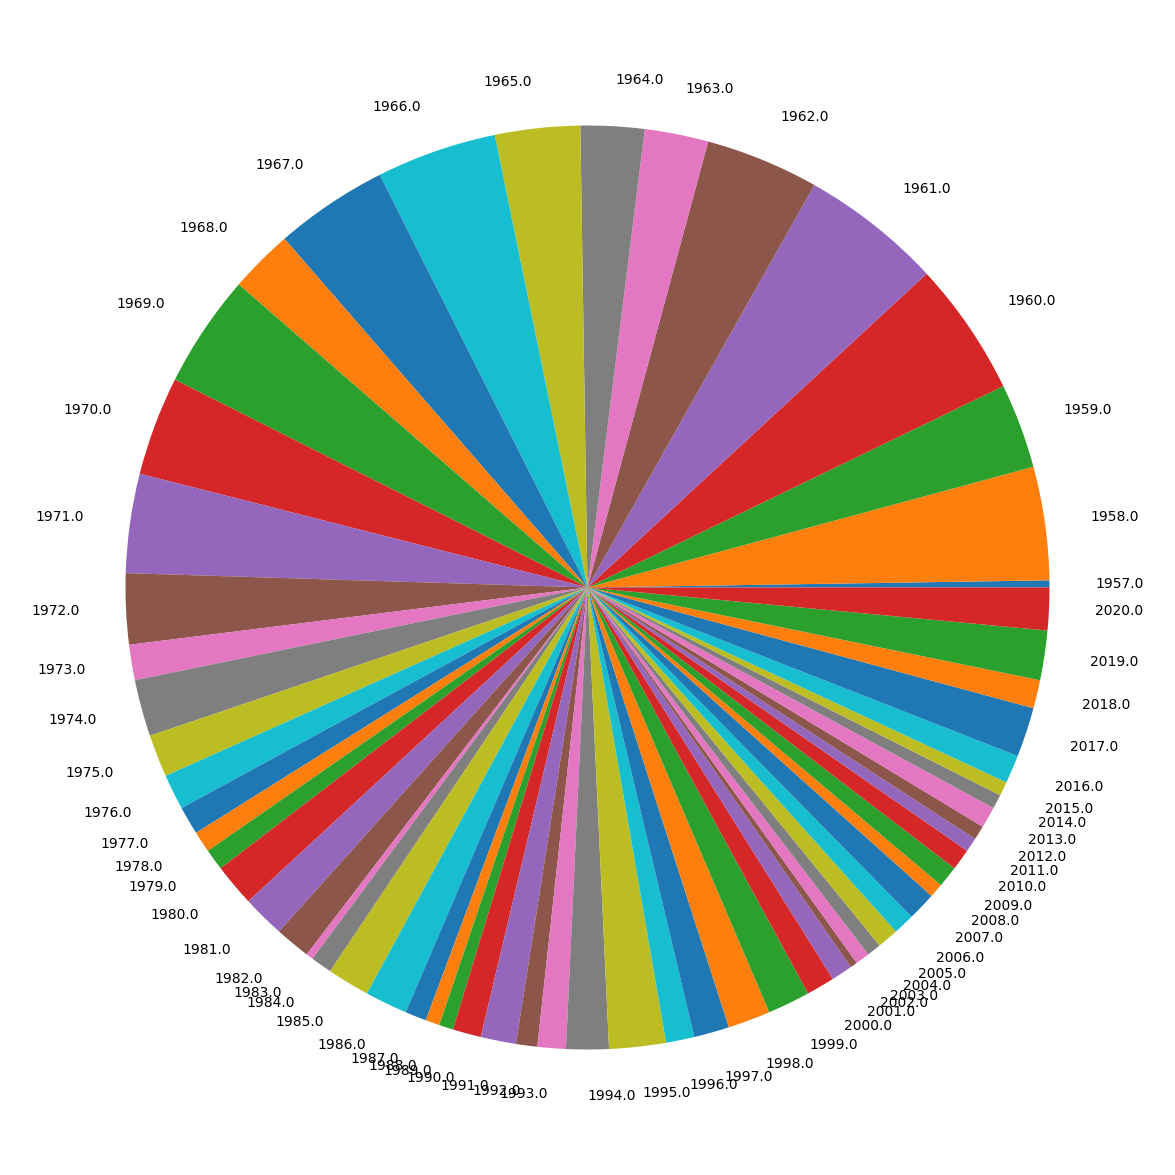

In [292]:
grouping = co_df.groupby("year").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['year']

plt.pie(sizes, labels = labels)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [293]:
country_launches = df_data.groupby("year")["Country"].value_counts().rename_axis(["year", "Country"]).reset_index(name='counts')

country_launches.loc[country_launches.groupby("year")["counts"].idxmax()]
country_launches.head()

,year,Country,counts
0,"1,957.00",RUS,2
1,"1,957.00",USA,1
2,"1,958.00",USA,17
3,"1,958.00",RUS,5
4,"1,959.00",USA,16


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [294]:
org_launches = df_data.groupby("year")["Organisation"].value_counts().rename_axis(["year", "Organisation"]).reset_index(name='counts')

org_launches.loc[org_launches.groupby("year")["counts"].idxmax()]
org_launches.head()

,year,Organisation,counts
0,"1,957.00",RVSN USSR,2
1,"1,957.00",US Navy,1
2,"1,958.00",AMBA,7
3,"1,958.00",US Navy,6
4,"1,958.00",RVSN USSR,5


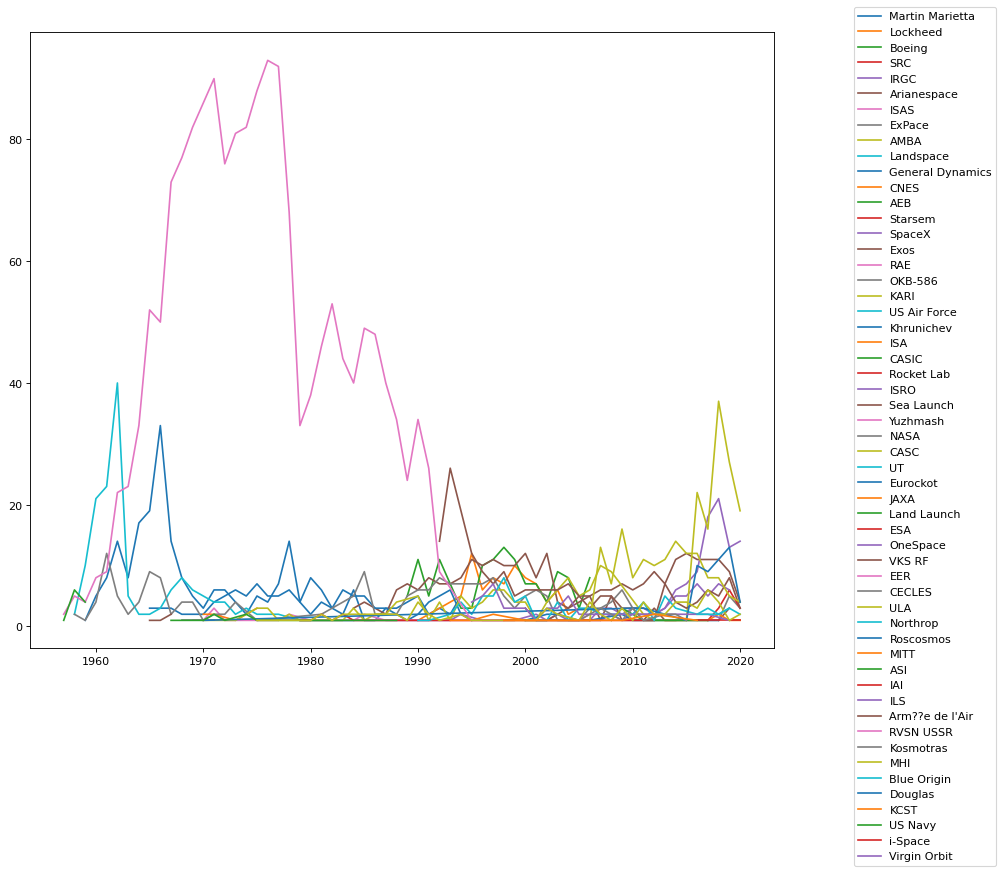

In [69]:
org_set = set(org_launches['Organisation'])

plt.figure(figsize=(12, 10), dpi=80)
for org in org_set:
     selected_data = org_launches.loc[org_launches['Organisation'] == org]
     plt.plot(selected_data['year'], selected_data['counts'], label=org)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))     
# plt.legend(bbox_to_anchor=(1.1, 1.05))
         
plt.show()